In [1]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

In [2]:
import os

os.chdir("..")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
import tqdm.auto as tqdm
import matplotlib.pyplot as plt
import torch
import numpy as np

from render_psam import render_psams, render_psam
from orthogonal_dfa.experiments.trained_models import r_rnn_500_1l_sparse_10_psams
from orthogonal_dfa.experiments.pdfa_residual import train_pdfa_wrt_all
from orthogonal_dfa.experiments.pdfa_residual import no_orf

from orthogonal_dfa.experiments.sparse_ngrams import *

In [4]:
models = r_rnn_500_1l_sparse_10_psams.results

In [5]:
remaining = np.array([train_pdfa_wrt_all(no_orf, gate)[-1] for gate in models["gates"]])

In [6]:
meta = models["metadata"][remaining.argmin()]

In [7]:
sparse_models = [x for x in meta if x["gate_before_update"]]

In [8]:
gate = sparse_models[-1]["gate_before_update"]

In [9]:
p = gate.phi.psams

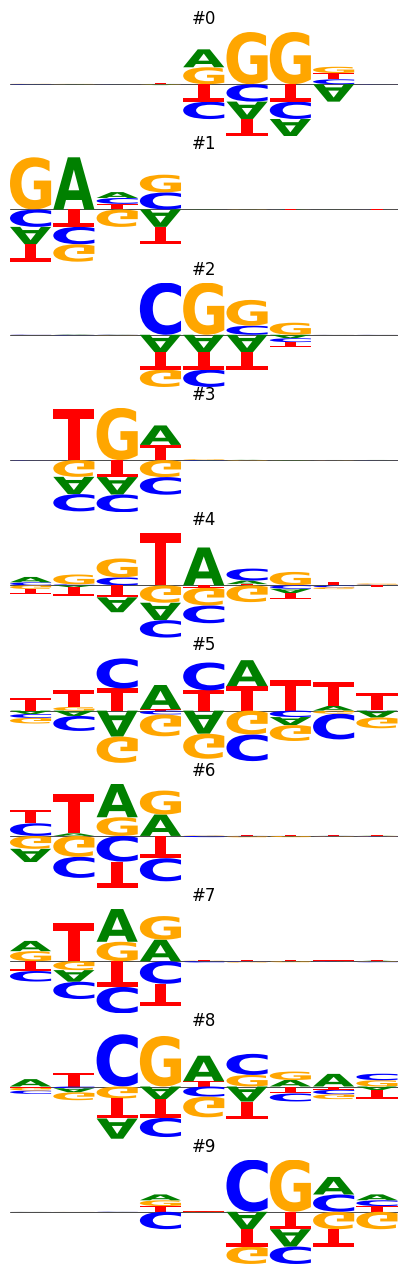

In [10]:
render_psams(
    p.sequence_logos,
    names=[f"#{i}" for i in range(p.sequence_logos.shape[0])],
    psam_mode="raw",
)
plt.show()

In [11]:
phi = gate.phi.eval()

In [12]:
x, m = compute_sparse_results(phi, seed=0)
logos_empirical = get_all_logos(x, m)

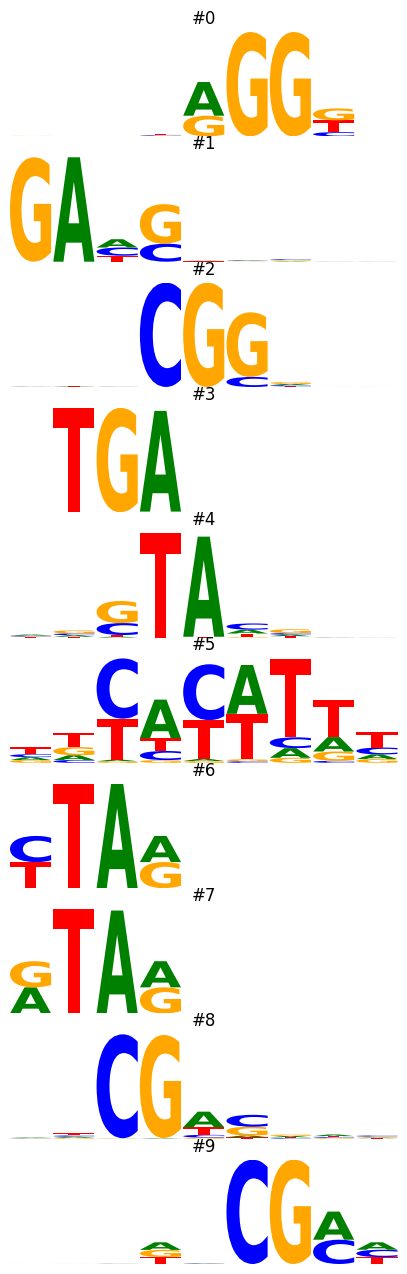

In [13]:
render_psams(
    logos_empirical,
    names=[f"#{i}" for i in range(p.sequence_logos.shape[0])],
    psam_mode="info",
)
plt.show()

In [14]:
three_grams = get_ngrams(get_sequences(x, m, 1), 3)

In [15]:
enrichments = get_all_ngram_enrichments(x, m, 3)

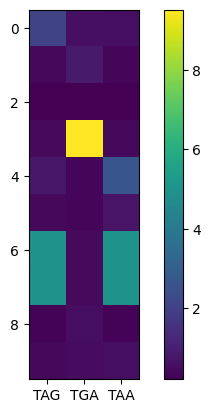

In [16]:
plt.imshow(enrichments[:, to_packed(np.array([[3, 0, 2], [3, 2, 0], [3, 0, 0]]))])
plt.xticks(range(3), ["TAG", "TGA", "TAA"])
plt.colorbar()
plt.show()